<a href="https://colab.research.google.com/github/majagurdek/Machine-Learning/blob/main/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import pickle

In [ ]:
#perceptrony i irysy

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

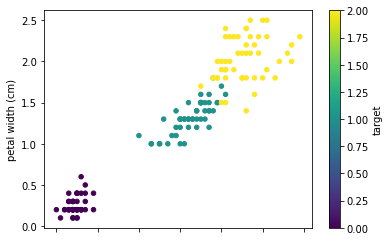

In [ ]:
pd.concat([iris.data, iris.target], axis=1).plot.scatter(
x='petal length (cm)',
y='petal width (cm)',
c='target',
colormap='viridis'
)

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data[["petal length (cm)", "petal width (cm)"]], iris.target, test_size=0.2)

In [ ]:
from sklearn.linear_model import Perceptron

y_train_0 = (y_train == 0).astype(int)
y_train_1 = (y_train == 1).astype(int)
y_train_2 = (y_train == 2).astype(int)

y_test_0 = (y_test == 0).astype(int)
y_test_1 = (y_test == 1).astype(int)
y_test_2 = (y_test == 2).astype(int)

In [ ]:
per_clf_0 = Perceptron()
per_clf_0.fit(X_train, y_train_0)

per_clf_1 = Perceptron()
per_clf_1.fit(X_train, y_train_1)

per_clf_2 = Perceptron()
per_clf_2.fit(X_train, y_train_2)

Perceptron()

In [ ]:
y_pred_train_0 = per_clf_0.predict(X_train)
y_pred_test_0 = per_clf_0.predict(X_test)

y_pred_train_1 = per_clf_1.predict(X_train)
y_pred_test_1 = per_clf_1.predict(X_test)

y_pred_train_2 = per_clf_2.predict(X_train)
y_pred_test_2 = per_clf_2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

acc_train_0 = accuracy_score(y_train_0, y_pred_train_0)
acc_test_0 = accuracy_score(y_test_0, y_pred_test_0)

acc_train_1 = accuracy_score(y_train_1, y_pred_train_1)
acc_test_1 = accuracy_score(y_test_1, y_pred_test_1)

acc_train_2 = accuracy_score(y_train_2, y_pred_train_2)
acc_test_2 = accuracy_score(y_test_2, y_pred_test_2)

In [ ]:
per_acc = [(acc_train_0, acc_test_0), (acc_train_1, acc_test_1), (acc_train_2, acc_test_2)]

In [ ]:
with open('per_acc.pkl', 'wb') as f:
    pickle.dump(per_acc, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('per_acc.pkl', 'rb') as f:
    print(pickle.load(f))

[(1.0, 1.0), (0.7, 0.5333333333333333), (0.8666666666666667, 0.8333333333333334)]


In [ ]:
w_0_0 = per_clf_0.intercept_[0]
w_0_1 = per_clf_0.coef_[0, 0]
w_0_2 = per_clf_0.coef_[0, 1]

In [ ]:
w_1_0 = per_clf_1.intercept_[0]
w_1_1 = per_clf_1.coef_[0, 0]
w_1_2 = per_clf_1.coef_[0, 1]

In [ ]:
w_2_0 = per_clf_2.intercept_[0]
w_2_1 = per_clf_2.coef_[0, 0]
w_2_2 = per_clf_2.coef_[0, 1]

In [ ]:
per_wght = [(w_0_0, w_0_1, w_0_2),(w_1_0,w_1_1,w_1_2),(w_2_0,w_2_1,w_2_2)]

In [ ]:
with open('per_wght.pkl', 'wb') as f:
    pickle.dump(per_wght, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('per_wght.pkl', 'rb') as f:
    print(pickle.load(f))

[(7.0, -2.6, -3.999999999999999), (-8.0, 0.500000000000016, -14.699999999999996), (-47.0, 3.3999999999999773, 23.700000000000003)]


In [ ]:
#Perceptron i XOR

In [ ]:
X = np.array([[0, 0],
[0, 1],
[1, 0],
[1, 1]])
y = np.array([0,
1,
1,
0])

In [ ]:
per_clf_xor = Perceptron()
per_clf_xor.fit(X,y)
print(per_clf_xor.predict(X))

[0 0 0 0]


In [ ]:
print(per_clf_xor.intercept_[0], per_clf_xor.coef_[0][0], per_clf_xor.coef_[0][1])

0.0 0.0 0.0


In [ ]:
#XOR, drugie podejście

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(2, activation="tanh", input_dim=2))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="sgd")

In [ ]:
history = model.fit(X, y, epochs=100, verbose=False)
print(history.history['loss'])

[0.7696276903152466, 0.7694072127342224, 0.7691875696182251, 0.7689687013626099, 0.7687505483627319, 0.7685331702232361, 0.7683166265487671, 0.7681007385253906, 0.767885684967041, 0.7676713466644287, 0.7674577236175537, 0.7672448754310608, 0.7670327425003052, 0.7668212652206421, 0.7666106820106506, 0.7664006948471069, 0.7661914825439453, 0.765982985496521, 0.7657751441001892, 0.7655680775642395, 0.7653616666793823, 0.7651559710502625, 0.7649509906768799, 0.7647466659545898, 0.7645429968833923, 0.7643400430679321, 0.7641377449035645, 0.7639361619949341, 0.7637352347373962, 0.7635350227355957, 0.7633353471755981, 0.7631363868713379, 0.7629381418228149, 0.7627404928207397, 0.7625435590744019, 0.7623472213745117, 0.7621514797210693, 0.7619563341140747, 0.7617619633674622, 0.7615680694580078, 0.7613750100135803, 0.761182427406311, 0.7609905004501343, 0.7607991695404053, 0.7606084942817688, 0.7604182958602905, 0.7602288722991943, 0.7600399851799011, 0.7598516941070557, 0.7596639394760132, 0.

In [ ]:
model.predict(X)

array([[0.50688624],
       [0.6042895 ],
       [0.3428156 ],
       [0.51420176]], dtype=float32)

In [ ]:
model_exp = keras.models.Sequential()
model_exp.add(keras.layers.Dense(2, activation="tanh", input_dim=2))
model_exp.add(keras.layers.Dense(1, activation="sigmoid"))

z = False
while not z:
  model_exp.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.15))
  history = model_exp.fit(X, y, epochs=100, verbose=False)
  if model_exp.predict(X)[0]<0.1 and model_exp.predict(X)[1]>0.9 and model_exp.predict(X)[2]>0.9 and model_exp.predict(X)[0]<0.1:
    z = True

In [ ]:
model_exp.predict(X)

In [ ]:
weights=model_exp.get_weights()
weights

In [ ]:
with open('mlp_xor_weights.pkl', 'wb') as f:
    pickle.dump(weights, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('mlp_xor_weights.pkl', 'rb') as f:
    print(pickle.load(f))